In [27]:
import pandas as pd

In [77]:
df = pd.read_csv("Churn_Modelling.csv")

In [78]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

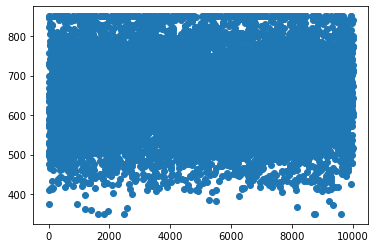

In [81]:
plt.scatter(df.index,df["CreditScore"])
plt.show()

In [82]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [83]:
df['IsActiveMember'].value_counts()


1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [84]:
df['Tenure'].value_counts()


2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

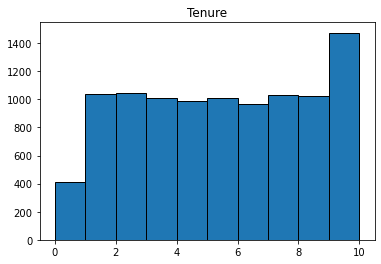

In [85]:
df.hist(column='Tenure', grid=False, edgecolor='black')
plt.show()

In [86]:
df = df.drop(columns=['RowNumber', 'CustomerId'])


In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [88]:
df.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,index,Exited
0,0,0.7963
1,1,0.2037


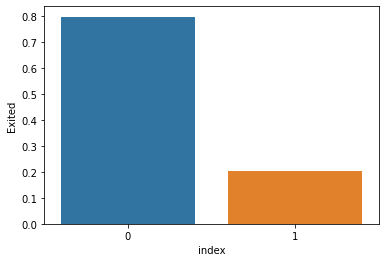

In [89]:
density = df['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited', );
density


In [90]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)


# of Bivariate Outliers: 19


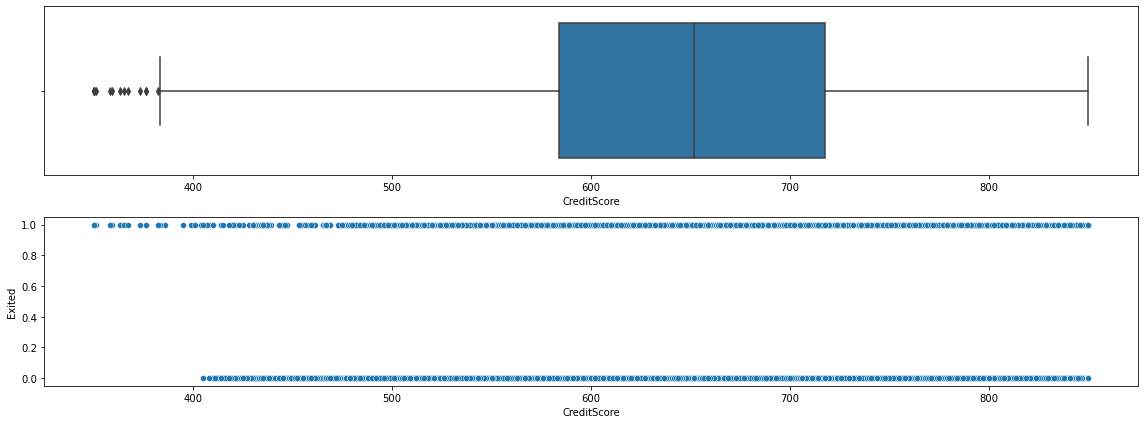

In [91]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")


# of Bivariate Outliers: 3


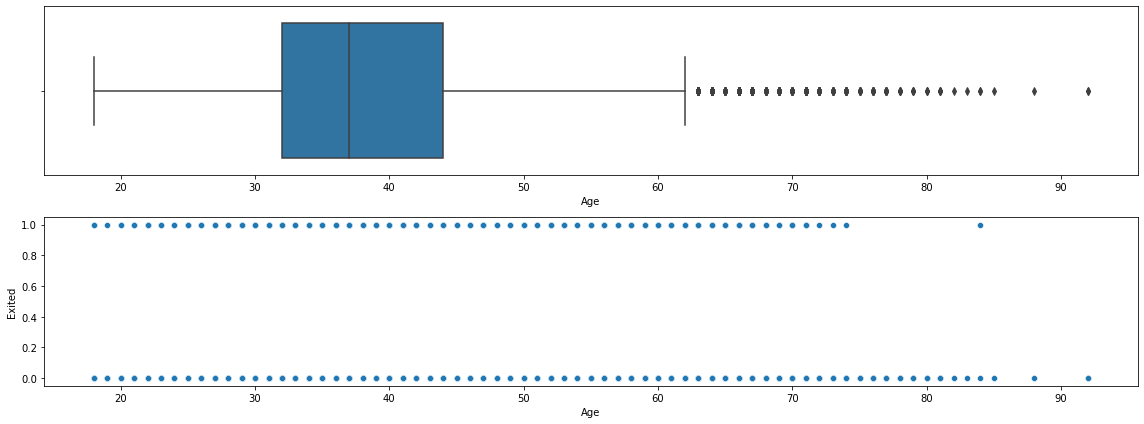

In [92]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")


# of Bivariate Outliers: 4


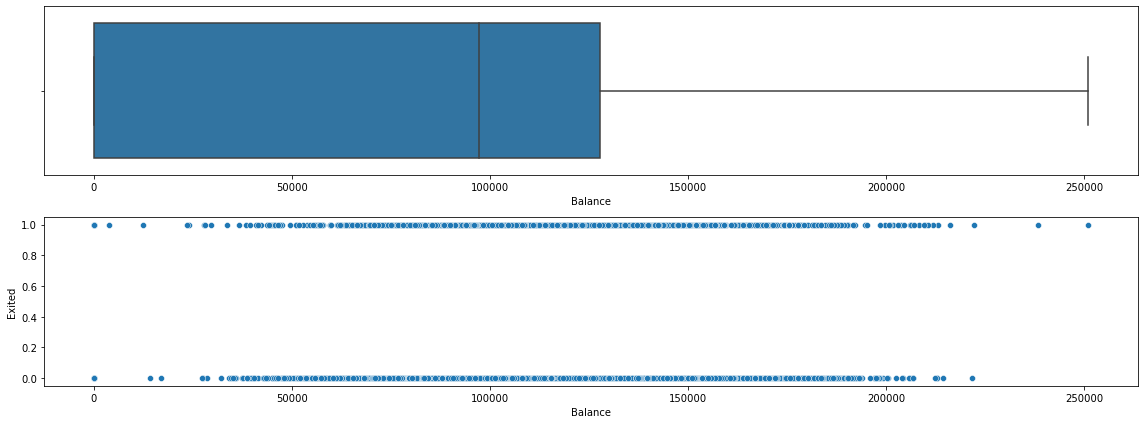

In [93]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")


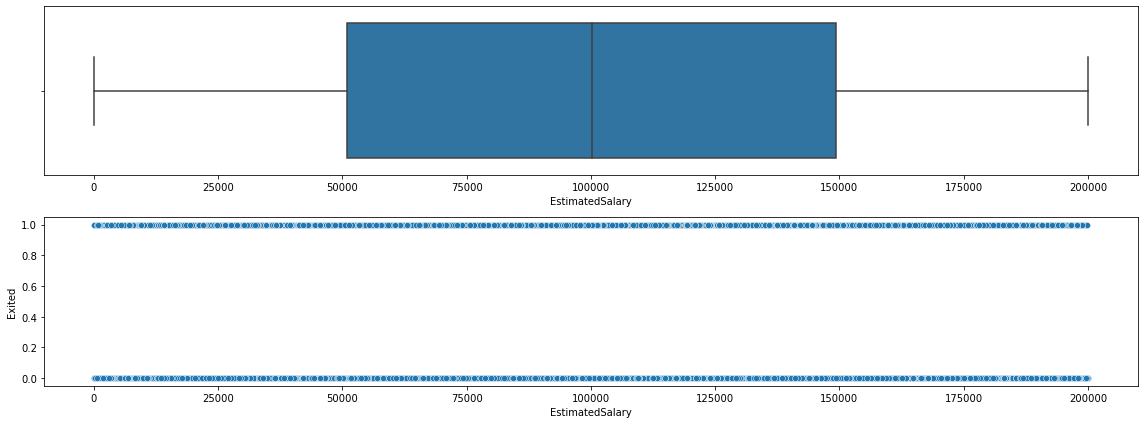

In [94]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()


In [95]:
df.isnull().sum()


Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [96]:
df.duplicated().sum()


0

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

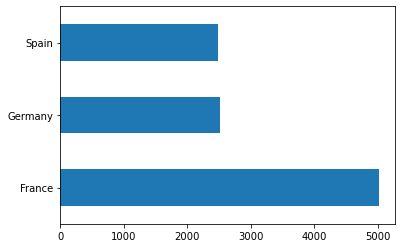

In [97]:
df.Geography.value_counts().plot(kind='barh');
df.Geography.value_counts()


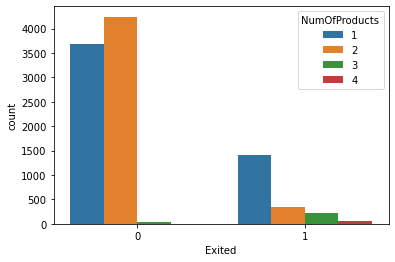

In [98]:
sns.countplot(x=df.Exited, hue=df.NumOfProducts);


<AxesSubplot:xlabel='Exited', ylabel='count'>

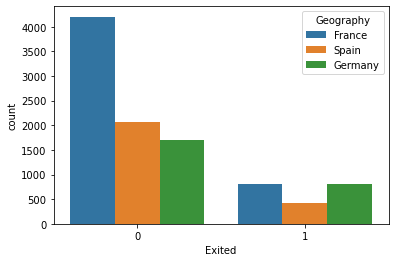

In [99]:
sns.countplot(x=df.Exited, hue=df.Geography)


In [100]:
import numpy as np

In [101]:
df.count()

Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [102]:
numeric_data = df.select_dtypes(include=[np.number]) 
categorical_data = df.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1]) 

Number of numerical variables:  9
Number of categorical variables:  3


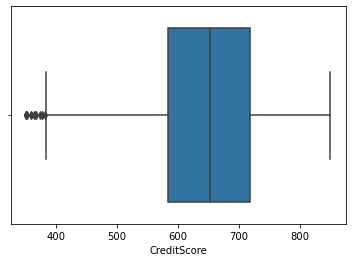

In [103]:
sns.boxplot(x='CreditScore', data=df)
plt.show()

Old Shape:  (10000, 12)
New Shape:  (9984, 12)


<AxesSubplot:xlabel='CreditScore'>

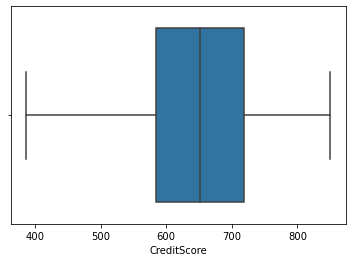

In [104]:
import sklearn
from sklearn.datasets import load_boston 

Q1 = np.percentile(df['CreditScore'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['CreditScore'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
print("Old Shape: ", df.shape) 
upper = np.where(df['CreditScore'] >= (Q3+1.5*IQR)) 
lower = np.where(df['CreditScore'] <= (Q1-1.5*IQR)) 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 
print("New Shape: ", df.shape) 
sns.boxplot(x='CreditScore', data=df)

In [105]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Cat_vars = list(categorical_data.columns)
Cat_vars

Number of categorical variables:  3


['Surname', 'Geography', 'Gender']

In [106]:
df['Geography'].value_counts()

France     5008
Germany    2505
Spain      2471
Name: Geography, dtype: int64

In [107]:
geo = {"Geography":{"France": 0, "Germany": 1, "Spain":2}}

In [108]:
df = df.replace(geo)

In [109]:
df['Gender'].value_counts()

Male      5450
Female    4534
Name: Gender, dtype: int64

In [110]:
gender = {"Gender": {"Male": 0, "Female": 1}}

In [111]:
df = df.replace(gender)

In [113]:
df.head

<bound method NDFrame.head of         Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619          0       1   42       2       0.00   
1          Hill          608          2       1   41       1   83807.86   
2          Onio          502          0       1   42       8  159660.80   
3          Boni          699          0       1   39       1       0.00   
4      Mitchell          850          2       1   43       2  125510.82   
...         ...          ...        ...     ...  ...     ...        ...   
9995   Obijiaku          771          0       0   39       5       0.00   
9996  Johnstone          516          0       0   35      10   57369.61   
9997        Liu          709          0       1   36       7       0.00   
9998  Sabbatini          772          1       0   42       3   75075.31   
9999     Walker          792          0       1   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exit

In [118]:
df.drop(columns=['Surname'], inplace=True)
print(data.head())

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       1   42       2       0.00              1   
1          608          2       1   41       1   83807.86              1   
2          502          0       1   42       8  159660.80              3   
3          699          0       1   39       1       0.00              2   
4          850          2       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [119]:
#Splitting the Dataset into the Independent Feature Matrix:
X = data.iloc[:, :-1].values
print(X)

[[6.1900000e+02 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 2.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [120]:
#Extracting the Dataset to Get the Dependent Vector
Y = data.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


In [121]:
from sklearn.preprocessing import StandardScaler
 
object= StandardScaler()
 
# standardization 
scale = object.fit_transform(X) 
print(scale)

[[-0.33310933 -0.90153179  1.09637088 ...  0.64635829  0.96941773
   0.02294   ]
 [-0.44765115  1.51578884  1.09637088 ... -1.54712953  0.96941773
   0.21755163]
 [-1.55141782 -0.90153179  1.09637088 ...  0.64635829 -1.03154705
   0.24170036]
 ...
 [ 0.60405105 -0.90153179  1.09637088 ... -1.54712953  0.96941773
  -1.00740094]
 [ 1.26006332  0.30712853 -0.91210011 ...  0.64635829 -1.03154705
  -0.12415028]
 [ 1.46832118 -0.90153179  1.09637088 ...  0.64635829 -1.03154705
  -1.07511523]]


In [122]:
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

In [123]:
X_train

array([[5.1500000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.6066311e+05],
       [5.5000000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 5.1721520e+04],
       [6.0200000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 4.1761700e+03],
       ...,
       [5.6000000e+02, 2.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.2318144e+05],
       [5.4400000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 9.8208620e+04],
       [5.3500000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.3662064e+05]])

In [124]:
X_test

array([[4.8500000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1682851e+05],
       [6.1500000e+02, 2.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.2639601e+05],
       [6.7900000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.7736245e+05],
       ...,
       [6.6300000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 7.6884050e+04],
       [7.2300000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.6219832e+05],
       [4.8400000e+02, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 3.3738270e+04]])

In [125]:
Y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,